In [1]:
SensorNum=2 # Sensor number
WindowWidth=[16,32,64,128,256,512,1024] # Window Width
OverlapArray=[4,8,16,32,64,128,256] # sliding window
width=1000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
Axis='AccY' # Axis

WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/2016-07-25"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
if not os.path.exists(WORKSPACE_PATH+'/study/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/study/'+DataName+'/')
StudyDataPath=WORKSPACE_PATH+'/study/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/graph/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/graph/'+DataName+'/')
GlaphDataPath=WORKSPACE_PATH+'/graph/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/modelPic/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/modelPic/'+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+'/modelPic/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/window/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/window/'+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+DataName+'/'

RawDataPath="/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/raw/"

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成 & Learning**

AccY is registed now
Build Complete
(254742,)
windowData's num =63682
SourceData's aborting data = 2
window shape is (63682, 16, 1)
hiden node = 4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
43s - loss: 0.0088 - val_loss: 0.0036
Epoch 2/50
55s - loss: 0.0026 - val_loss: 0.0020
Epoch 3/50
57s - loss: 0.0017 - val_loss: 0.0016
Epoch 4/50
49s - loss: 0.0015 - val_loss: 0.0014
Epoch 5/50
50s - loss: 0.0013 - val_loss: 0.0013
Epoch 6/50
48s - loss: 0.0012 - val_loss: 0.0011
Epoch 7/50
50s - loss: 0.0011 - val_loss: 0.0011
Epoch 8/50
50s - loss: 0.0010 - val_loss: 9.8522e-04
Epoch 9/50
49s - loss: 9.6468e-04 - val_loss: 9.3814e-04
Epoch 10/50
49s - loss: 9.3039e-04 - val_loss: 9.0392e-04
Epoch 11/50
49s - loss: 8.9805e-04 - val_loss: 8.8294e-04
Epoch 12/50
49s - loss: 8.7452e-04 - val_loss: 9.4067e-04
Epoch 13/50
50s - loss: 8.5588e-04 - val_loss: 8.4479e-04
Epoch 14/50
49s - loss: 8.3761e-04 - val_loss: 8.2574e-04
Epoch 15/50
49s - loss: 8.2451e-04 - val_loss: 8.0264e-04
Ep

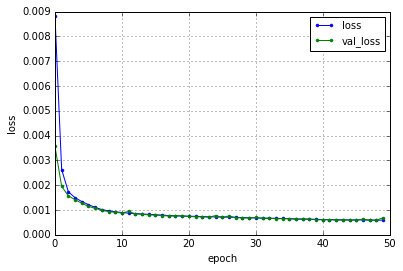

hiden node = 8
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
62s - loss: 0.0075 - val_loss: 0.0018
Epoch 2/50
61s - loss: 0.0014 - val_loss: 0.0011
Epoch 3/50
62s - loss: 0.0010 - val_loss: 9.3421e-04
Epoch 4/50
62s - loss: 8.8282e-04 - val_loss: 8.3333e-04
Epoch 5/50
62s - loss: 8.1125e-04 - val_loss: 8.0615e-04
Epoch 6/50
62s - loss: 7.7020e-04 - val_loss: 7.3490e-04
Epoch 7/50
62s - loss: 7.3647e-04 - val_loss: 7.1000e-04
Epoch 8/50
62s - loss: 7.1579e-04 - val_loss: 6.9854e-04
Epoch 9/50
62s - loss: 6.9932e-04 - val_loss: 6.7589e-04
Epoch 10/50
62s - loss: 6.8362e-04 - val_loss: 6.6720e-04
Epoch 11/50
62s - loss: 6.7564e-04 - val_loss: 6.5027e-04
Epoch 12/50
62s - loss: 6.6809e-04 - val_loss: 6.5871e-04
Epoch 13/50
62s - loss: 6.6626e-04 - val_loss: 6.5931e-04
Epoch 14/50
62s - loss: 6.5971e-04 - val_loss: 6.4799e-04
Epoch 15/50
62s - loss: 6.5393e-04 - val_loss: 6.3729e-04
Epoch 16/50
62s - loss: 6.4820e-04 - val_loss: 6.3282e-04
Epoch 17/50
62s - loss: 6.4526e-04 -

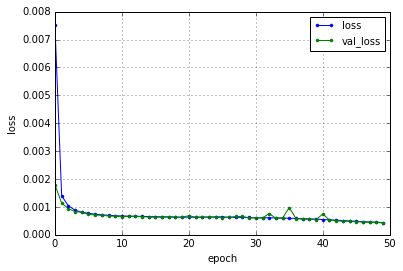

hiden node = 12
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
61s - loss: 0.0072 - val_loss: 0.0014
Epoch 2/50
62s - loss: 0.0011 - val_loss: 8.6176e-04
Epoch 3/50
62s - loss: 7.8466e-04 - val_loss: 7.2145e-04
Epoch 4/50
62s - loss: 6.7772e-04 - val_loss: 6.3033e-04
Epoch 5/50
62s - loss: 6.1229e-04 - val_loss: 5.6734e-04
Epoch 6/50
61s - loss: 5.6474e-04 - val_loss: 5.4133e-04
Epoch 7/50
61s - loss: 5.3862e-04 - val_loss: 5.1023e-04
Epoch 8/50
62s - loss: 5.0652e-04 - val_loss: 4.8913e-04
Epoch 9/50
62s - loss: 4.9642e-04 - val_loss: 4.7401e-04
Epoch 10/50
62s - loss: 4.8925e-04 - val_loss: 4.4996e-04
Epoch 11/50
62s - loss: 4.6585e-04 - val_loss: 4.6874e-04
Epoch 12/50
62s - loss: 4.6619e-04 - val_loss: 4.7384e-04
Epoch 13/50
62s - loss: 4.6926e-04 - val_loss: 4.3869e-04
Epoch 14/50
62s - loss: 4.5933e-04 - val_loss: 4.5147e-04
Epoch 15/50
62s - loss: 4.5939e-04 - val_loss: 4.2868e-04
Epoch 16/50
62s - loss: 4.5449e-04 - val_loss: 4.3872e-04
Epoch 17/50
62s - loss: 4.5

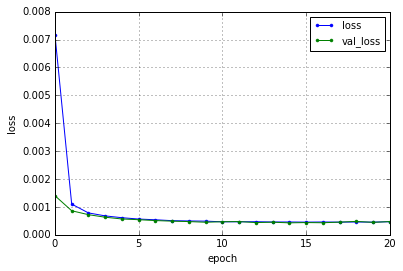

hiden node = 16
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
65s - loss: 0.0039 - val_loss: 0.0011
Epoch 2/50
65s - loss: 8.5400e-04 - val_loss: 7.2625e-04
Epoch 3/50
65s - loss: 6.8326e-04 - val_loss: 6.4845e-04
Epoch 4/50
65s - loss: 6.0448e-04 - val_loss: 5.6989e-04
Epoch 5/50
65s - loss: 5.6034e-04 - val_loss: 7.3251e-04
Epoch 6/50
64s - loss: 5.3004e-04 - val_loss: 4.8632e-04
Epoch 7/50
65s - loss: 5.0486e-04 - val_loss: 4.9467e-04
Epoch 8/50
65s - loss: 4.9351e-04 - val_loss: 4.5857e-04
Epoch 9/50
65s - loss: 4.7211e-04 - val_loss: 4.5496e-04
Epoch 10/50
65s - loss: 4.5168e-04 - val_loss: 4.3455e-04
Epoch 11/50
65s - loss: 4.4569e-04 - val_loss: 4.2635e-04
Epoch 12/50
65s - loss: 4.3098e-04 - val_loss: 4.1561e-04
Epoch 13/50
65s - loss: 4.1642e-04 - val_loss: 3.9691e-04
Epoch 14/50
65s - loss: 4.0489e-04 - val_loss: 4.2105e-04
Epoch 15/50
65s - loss: 3.9334e-04 - val_loss: 3.6354e-04
Epoch 16/50
65s - loss: 3.7652e-04 - val_loss: 3.6032e-04
Epoch 17/50
65s - loss:

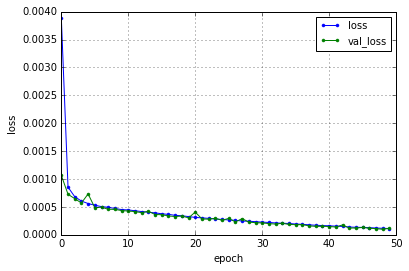

hiden node = 32
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
62s - loss: 0.0025 - val_loss: 4.8135e-04
Epoch 2/50
62s - loss: 4.3760e-04 - val_loss: 3.6531e-04
Epoch 3/50
62s - loss: 3.5424e-04 - val_loss: 2.9902e-04
Epoch 4/50
61s - loss: 3.1087e-04 - val_loss: 2.7501e-04
Epoch 5/50
61s - loss: 2.8659e-04 - val_loss: 2.4620e-04
Epoch 6/50
62s - loss: 2.6898e-04 - val_loss: 2.4687e-04
Epoch 7/50
62s - loss: 2.6295e-04 - val_loss: 2.5411e-04
Epoch 8/50
62s - loss: 2.6348e-04 - val_loss: 2.4132e-04
Epoch 9/50
62s - loss: 2.6214e-04 - val_loss: 2.2955e-04
Epoch 10/50
62s - loss: 2.6254e-04 - val_loss: 2.4841e-04
Epoch 11/50
62s - loss: 2.6385e-04 - val_loss: 2.5683e-04
Epoch 12/50
62s - loss: 2.6575e-04 - val_loss: 2.4506e-04
Epoch 13/50
61s - loss: 2.7410e-04 - val_loss: 2.6699e-04
Epoch 14/50
61s - loss: 2.8025e-04 - val_loss: 2.5363e-04
Epoch 15/50
62s - loss: 2.7622e-04 - val_loss: 2.7635e-04


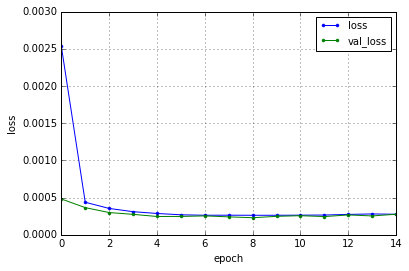

hiden node = 64
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
62s - loss: 0.0016 - val_loss: 3.4819e-04
Epoch 2/50
61s - loss: 2.9542e-04 - val_loss: 2.7146e-04
Epoch 3/50
62s - loss: 2.2145e-04 - val_loss: 1.8682e-04
Epoch 4/50
62s - loss: 1.8896e-04 - val_loss: 5.0261e-04
Epoch 5/50
62s - loss: 1.6640e-04 - val_loss: 1.3517e-04
Epoch 6/50
62s - loss: 1.5430e-04 - val_loss: 2.0338e-04
Epoch 7/50
62s - loss: 1.4331e-04 - val_loss: 1.1272e-04
Epoch 8/50
62s - loss: 1.3007e-04 - val_loss: 1.5520e-04
Epoch 9/50
61s - loss: 1.2276e-04 - val_loss: 9.6294e-05
Epoch 10/50
62s - loss: 1.1504e-04 - val_loss: 8.7510e-05
Epoch 11/50
62s - loss: 1.1468e-04 - val_loss: 8.5519e-05
Epoch 12/50
62s - loss: 1.1118e-04 - val_loss: 9.1973e-05
Epoch 13/50
62s - loss: 1.0762e-04 - val_loss: 8.4362e-05
Epoch 14/50
62s - loss: 1.0847e-04 - val_loss: 8.3626e-05
Epoch 15/50
62s - loss: 1.0649e-04 - val_loss: 9.8674e-05
Epoch 16/50
62s - loss: 1.0813e-04 - val_loss: 9.2784e-05
Epoch 17/50
62s - l

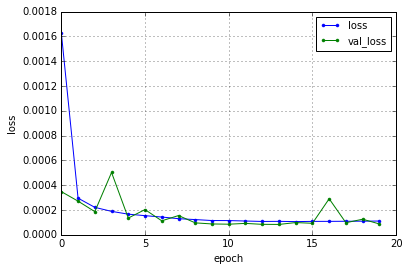

AccY is registed now
Build Complete
(254742,)
windowData's num =31839
SourceData's aborting data = 6
window shape is (31839, 32, 1)
hiden node = 4
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
15s - loss: 0.0318 - val_loss: 0.0091
Epoch 2/50
16s - loss: 0.0078 - val_loss: 0.0066
Epoch 3/50
15s - loss: 0.0057 - val_loss: 0.0051
Epoch 4/50
14s - loss: 0.0045 - val_loss: 0.0041
Epoch 5/50
15s - loss: 0.0038 - val_loss: 0.0035
Epoch 6/50
16s - loss: 0.0033 - val_loss: 0.0032
Epoch 7/50
16s - loss: 0.0030 - val_loss: 0.0028
Epoch 8/50
14s - loss: 0.0028 - val_loss: 0.0026
Epoch 9/50
15s - loss: 0.0026 - val_loss: 0.0025
Epoch 10/50
16s - loss: 0.0024 - val_loss: 0.0023
Epoch 11/50
16s - loss: 0.0023 - val_loss: 0.0022
Epoch 12/50
14s - loss: 0.0022 - val_loss: 0.0021
Epoch 13/50
15s - loss: 0.0021 - val_loss: 0.0020
Epoch 14/50
16s - loss: 0.0020 - val_loss: 0.0020
Epoch 15/50
15s - loss: 0.0019 - val_loss: 0.0019
Epoch 16/50
14s - loss: 0.0019 - val_loss: 0.0018
Epoch 17/50


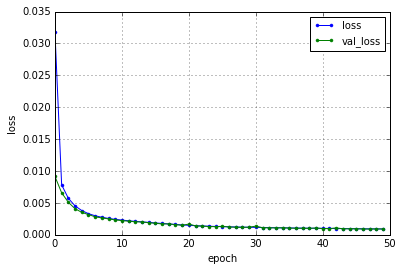

hiden node = 8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
15s - loss: 0.0231 - val_loss: 0.0065
Epoch 2/50
14s - loss: 0.0050 - val_loss: 0.0041
Epoch 3/50
14s - loss: 0.0035 - val_loss: 0.0029
Epoch 4/50
16s - loss: 0.0026 - val_loss: 0.0024
Epoch 5/50
15s - loss: 0.0021 - val_loss: 0.0019
Epoch 6/50
14s - loss: 0.0018 - val_loss: 0.0017
Epoch 7/50
15s - loss: 0.0016 - val_loss: 0.0015
Epoch 8/50
16s - loss: 0.0014 - val_loss: 0.0013
Epoch 9/50
15s - loss: 0.0013 - val_loss: 0.0012
Epoch 10/50
14s - loss: 0.0012 - val_loss: 0.0011
Epoch 11/50
15s - loss: 0.0011 - val_loss: 0.0011
Epoch 12/50
16s - loss: 0.0011 - val_loss: 0.0010
Epoch 13/50
15s - loss: 0.0010 - val_loss: 9.5998e-04
Epoch 14/50
14s - loss: 9.6114e-04 - val_loss: 9.1607e-04
Epoch 15/50
15s - loss: 9.2138e-04 - val_loss: 8.9813e-04
Epoch 16/50
15s - loss: 8.9116e-04 - val_loss: 8.3644e-04
Epoch 17/50
15s - loss: 8.5814e-04 - val_loss: 8.2801e-04
Epoch 18/50
14s - loss: 8.2965e-04 - val_loss: 7.9157e-04


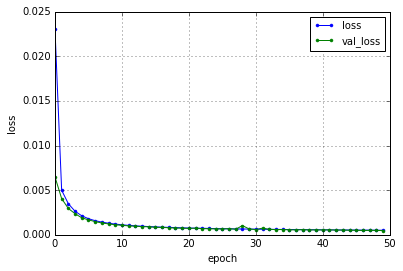

hiden node = 12
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
13s - loss: 0.0199 - val_loss: 0.0046
Epoch 2/50
13s - loss: 0.0037 - val_loss: 0.0030
Epoch 3/50
11s - loss: 0.0027 - val_loss: 0.0022
Epoch 4/50
11s - loss: 0.0021 - val_loss: 0.0018
Epoch 5/50
12s - loss: 0.0017 - val_loss: 0.0015
Epoch 6/50
13s - loss: 0.0014 - val_loss: 0.0013
Epoch 7/50
12s - loss: 0.0013 - val_loss: 0.0012
Epoch 8/50
11s - loss: 0.0012 - val_loss: 0.0011
Epoch 9/50
13s - loss: 0.0011 - val_loss: 9.8145e-04
Epoch 10/50
13s - loss: 9.8414e-04 - val_loss: 9.5648e-04
Epoch 11/50
11s - loss: 9.1953e-04 - val_loss: 8.4923e-04
Epoch 12/50
11s - loss: 8.7061e-04 - val_loss: 8.3549e-04
Epoch 13/50
12s - loss: 8.3354e-04 - val_loss: 7.5795e-04
Epoch 14/50
13s - loss: 7.8786e-04 - val_loss: 7.4662e-04
Epoch 15/50
12s - loss: 7.5481e-04 - val_loss: 7.1575e-04
Epoch 16/50
11s - loss: 7.2520e-04 - val_loss: 6.6543e-04
Epoch 17/50
13s - loss: 6.9566e-04 - val_loss: 6.9332e-04
Epoch 18/50
13s - loss: 6

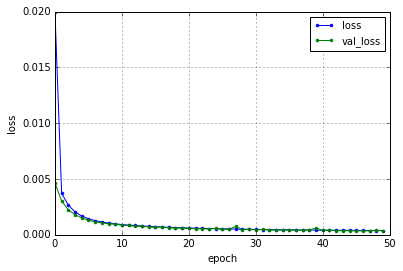

hiden node = 16
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
11s - loss: 0.0151 - val_loss: 0.0037
Epoch 2/50
12s - loss: 0.0028 - val_loss: 0.0022
Epoch 3/50
13s - loss: 0.0019 - val_loss: 0.0016
Epoch 4/50
12s - loss: 0.0015 - val_loss: 0.0014
Epoch 5/50
11s - loss: 0.0013 - val_loss: 0.0012
Epoch 6/50
11s - loss: 0.0011 - val_loss: 9.9553e-04
Epoch 7/50
13s - loss: 9.9647e-04 - val_loss: 9.1509e-04
Epoch 8/50
12s - loss: 9.1439e-04 - val_loss: 9.3152e-04
Epoch 9/50
11s - loss: 8.5094e-04 - val_loss: 8.4318e-04
Epoch 10/50
12s - loss: 7.8981e-04 - val_loss: 7.3239e-04
Epoch 11/50
13s - loss: 7.4605e-04 - val_loss: 6.9601e-04
Epoch 12/50
12s - loss: 7.0512e-04 - val_loss: 6.4743e-04
Epoch 13/50
11s - loss: 6.6360e-04 - val_loss: 7.4334e-04
Epoch 14/50
12s - loss: 6.3196e-04 - val_loss: 5.8174e-04
Epoch 15/50
13s - loss: 6.0144e-04 - val_loss: 6.5025e-04
Epoch 16/50
12s - loss: 5.8332e-04 - val_loss: 5.8653e-04
Epoch 17/50
11s - loss: 5.5913e-04 - val_loss: 5.5552e-04
E

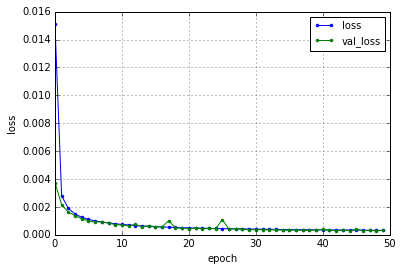

hiden node = 32
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
12s - loss: 0.0117 - val_loss: 0.0022
Epoch 2/50
12s - loss: 0.0016 - val_loss: 0.0012
Epoch 3/50
11s - loss: 0.0011 - val_loss: 9.7449e-04
Epoch 4/50
12s - loss: 8.5629e-04 - val_loss: 0.0011
Epoch 5/50
12s - loss: 7.1871e-04 - val_loss: 6.4858e-04
Epoch 6/50
12s - loss: 6.3248e-04 - val_loss: 5.3843e-04
Epoch 7/50
12s - loss: 5.6253e-04 - val_loss: 4.9485e-04
Epoch 8/50
12s - loss: 5.1179e-04 - val_loss: 4.6934e-04
Epoch 9/50
13s - loss: 4.7617e-04 - val_loss: 4.0882e-04
Epoch 10/50
12s - loss: 4.5262e-04 - val_loss: 4.6403e-04
Epoch 11/50
11s - loss: 4.2393e-04 - val_loss: 3.6001e-04
Epoch 12/50
12s - loss: 4.0148e-04 - val_loss: 3.7453e-04
Epoch 13/50
12s - loss: 3.8619e-04 - val_loss: 3.6596e-04
Epoch 14/50
12s - loss: 3.6695e-04 - val_loss: 3.1100e-04
Epoch 15/50
11s - loss: 3.5538e-04 - val_loss: 3.1271e-04
Epoch 16/50
11s - loss: 3.3906e-04 - val_loss: 2.7722e-04
Epoch 17/50
12s - loss: 3.3067e-04 - va

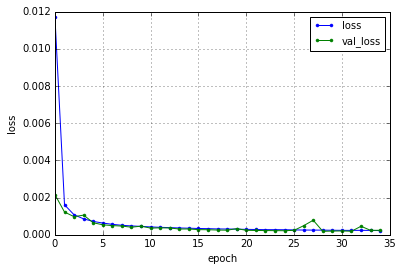

hiden node = 64
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
12s - loss: 0.0073 - val_loss: 0.0013
Epoch 2/50
13s - loss: 9.9583e-04 - val_loss: 7.3500e-04
Epoch 3/50
12s - loss: 6.7907e-04 - val_loss: 5.6836e-04
Epoch 4/50
11s - loss: 5.3002e-04 - val_loss: 4.7642e-04
Epoch 5/50
12s - loss: 4.5364e-04 - val_loss: 4.2886e-04
Epoch 6/50
12s - loss: 3.9933e-04 - val_loss: 0.0012
Epoch 7/50
12s - loss: 3.6406e-04 - val_loss: 2.8390e-04
Epoch 8/50
11s - loss: 3.3672e-04 - val_loss: 2.9913e-04
Epoch 9/50
12s - loss: 3.0363e-04 - val_loss: 2.2634e-04
Epoch 10/50
12s - loss: 2.9206e-04 - val_loss: 2.5528e-04
Epoch 11/50
12s - loss: 2.7255e-04 - val_loss: 2.1217e-04
Epoch 12/50
12s - loss: 2.6292e-04 - val_loss: 2.1239e-04
Epoch 13/50
12s - loss: 2.4578e-04 - val_loss: 1.9931e-04
Epoch 14/50
13s - loss: 2.4124e-04 - val_loss: 2.7037e-04
Epoch 15/50
12s - loss: 2.3419e-04 - val_loss: 1.6210e-04
Epoch 16/50
11s - loss: 2.2720e-04 - val_loss: 1.6480e-04
Epoch 17/50
12s - loss: 2.2

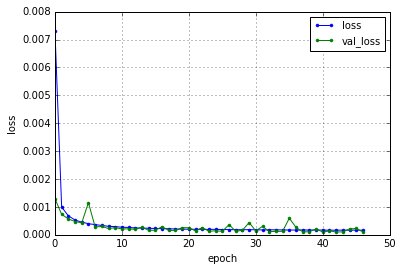

AccY is registed now
Build Complete
(254742,)
windowData's num =15918
SourceData's aborting data = 6
window shape is (15918, 64, 1)
hiden node = 4
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0803 - val_loss: 0.0170
Epoch 2/50
3s - loss: 0.0148 - val_loss: 0.0134
Epoch 3/50
3s - loss: 0.0124 - val_loss: 0.0115
Epoch 4/50
3s - loss: 0.0106 - val_loss: 0.0098
Epoch 5/50
3s - loss: 0.0093 - val_loss: 0.0089
Epoch 6/50
3s - loss: 0.0086 - val_loss: 0.0083
Epoch 7/50
3s - loss: 0.0081 - val_loss: 0.0078
Epoch 8/50
3s - loss: 0.0076 - val_loss: 0.0075
Epoch 9/50
2s - loss: 0.0072 - val_loss: 0.0070
Epoch 10/50
3s - loss: 0.0070 - val_loss: 0.0072
Epoch 11/50
3s - loss: 0.0067 - val_loss: 0.0065
Epoch 12/50
2s - loss: 0.0065 - val_loss: 0.0064
Epoch 13/50
2s - loss: 0.0063 - val_loss: 0.0062
Epoch 14/50
2s - loss: 0.0062 - val_loss: 0.0060
Epoch 15/50
3s - loss: 0.0060 - val_loss: 0.0059
Epoch 16/50
3s - loss: 0.0059 - val_loss: 0.0058
Epoch 17/50
3s - loss: 0.005

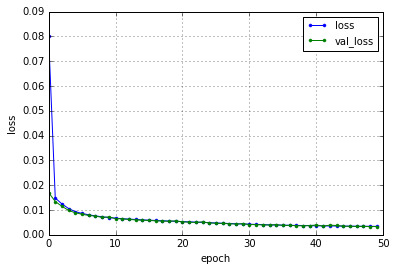

hiden node = 8
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0564 - val_loss: 0.0146
Epoch 2/50
3s - loss: 0.0125 - val_loss: 0.0107
Epoch 3/50
3s - loss: 0.0097 - val_loss: 0.0087
Epoch 4/50
3s - loss: 0.0082 - val_loss: 0.0075
Epoch 5/50
3s - loss: 0.0070 - val_loss: 0.0071
Epoch 6/50
3s - loss: 0.0061 - val_loss: 0.0058
Epoch 7/50
3s - loss: 0.0053 - val_loss: 0.0049
Epoch 8/50
3s - loss: 0.0047 - val_loss: 0.0044
Epoch 9/50
2s - loss: 0.0042 - val_loss: 0.0039
Epoch 10/50
2s - loss: 0.0039 - val_loss: 0.0038
Epoch 11/50
2s - loss: 0.0036 - val_loss: 0.0034
Epoch 12/50
3s - loss: 0.0033 - val_loss: 0.0031
Epoch 13/50
3s - loss: 0.0031 - val_loss: 0.0030
Epoch 14/50
3s - loss: 0.0029 - val_loss: 0.0027
Epoch 15/50
3s - loss: 0.0027 - val_loss: 0.0026
Epoch 16/50
3s - loss: 0.0025 - val_loss: 0.0028
Epoch 17/50
3s - loss: 0.0024 - val_loss: 0.0022
Epoch 18/50
3s - loss: 0.0023 - val_loss: 0.0024
Epoch 19/50
3s - loss: 0.0022 - val_loss: 0.0020
Epoch 20/50
3

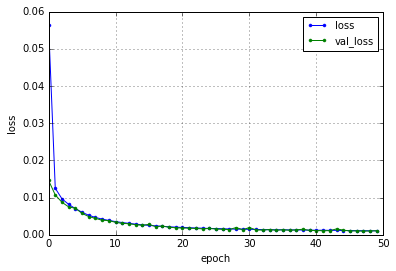

hiden node = 12
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0425 - val_loss: 0.0130
Epoch 2/50
3s - loss: 0.0108 - val_loss: 0.0091
Epoch 3/50
3s - loss: 0.0077 - val_loss: 0.0068
Epoch 4/50
3s - loss: 0.0061 - val_loss: 0.0055
Epoch 5/50
3s - loss: 0.0051 - val_loss: 0.0046
Epoch 6/50
2s - loss: 0.0044 - val_loss: 0.0041
Epoch 7/50
2s - loss: 0.0039 - val_loss: 0.0036
Epoch 8/50
3s - loss: 0.0035 - val_loss: 0.0033
Epoch 9/50
2s - loss: 0.0032 - val_loss: 0.0031
Epoch 10/50
2s - loss: 0.0029 - val_loss: 0.0027
Epoch 11/50
3s - loss: 0.0027 - val_loss: 0.0024
Epoch 12/50
3s - loss: 0.0025 - val_loss: 0.0022
Epoch 13/50
3s - loss: 0.0023 - val_loss: 0.0023
Epoch 14/50
3s - loss: 0.0022 - val_loss: 0.0020
Epoch 15/50
3s - loss: 0.0020 - val_loss: 0.0024
Epoch 16/50
3s - loss: 0.0019 - val_loss: 0.0021
Epoch 17/50
3s - loss: 0.0018 - val_loss: 0.0016
Epoch 18/50
3s - loss: 0.0017 - val_loss: 0.0020
Epoch 19/50
3s - loss: 0.0016 - val_loss: 0.0015
Epoch 20/50


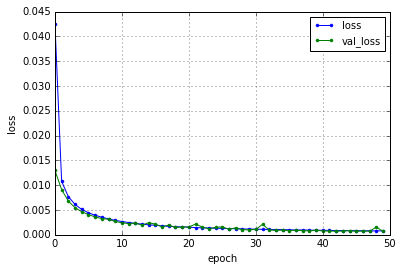

hiden node = 16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0413 - val_loss: 0.0119
Epoch 2/50
3s - loss: 0.0095 - val_loss: 0.0076
Epoch 3/50
2s - loss: 0.0066 - val_loss: 0.0067
Epoch 4/50
3s - loss: 0.0050 - val_loss: 0.0043
Epoch 5/50
3s - loss: 0.0041 - val_loss: 0.0036
Epoch 6/50
3s - loss: 0.0034 - val_loss: 0.0030
Epoch 7/50
3s - loss: 0.0030 - val_loss: 0.0028
Epoch 8/50
3s - loss: 0.0026 - val_loss: 0.0024
Epoch 9/50
3s - loss: 0.0024 - val_loss: 0.0024
Epoch 10/50
3s - loss: 0.0022 - val_loss: 0.0021
Epoch 11/50
3s - loss: 0.0020 - val_loss: 0.0018
Epoch 12/50
3s - loss: 0.0019 - val_loss: 0.0017
Epoch 13/50
3s - loss: 0.0017 - val_loss: 0.0022
Epoch 14/50
3s - loss: 0.0017 - val_loss: 0.0014
Epoch 15/50
3s - loss: 0.0015 - val_loss: 0.0014
Epoch 16/50
3s - loss: 0.0015 - val_loss: 0.0014
Epoch 17/50
3s - loss: 0.0014 - val_loss: 0.0012
Epoch 18/50
3s - loss: 0.0013 - val_loss: 0.0013
Epoch 19/50
2s - loss: 0.0012 - val_loss: 0.0021
Epoch 20/50


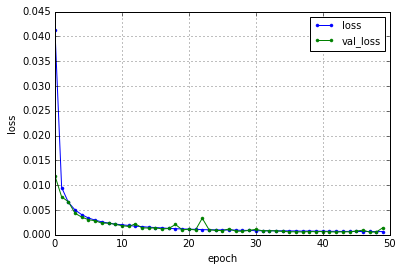

hiden node = 32
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0294 - val_loss: 0.0068
Epoch 2/50
2s - loss: 0.0052 - val_loss: 0.0041
Epoch 3/50
3s - loss: 0.0033 - val_loss: 0.0028
Epoch 4/50
3s - loss: 0.0025 - val_loss: 0.0021
Epoch 5/50
3s - loss: 0.0021 - val_loss: 0.0019
Epoch 6/50
3s - loss: 0.0018 - val_loss: 0.0015
Epoch 7/50
3s - loss: 0.0016 - val_loss: 0.0013
Epoch 8/50
3s - loss: 0.0014 - val_loss: 0.0014
Epoch 9/50
3s - loss: 0.0013 - val_loss: 0.0011
Epoch 10/50
3s - loss: 0.0012 - val_loss: 0.0011
Epoch 11/50
3s - loss: 0.0011 - val_loss: 0.0013
Epoch 12/50
3s - loss: 0.0011 - val_loss: 8.7899e-04
Epoch 13/50
3s - loss: 0.0010 - val_loss: 8.8606e-04
Epoch 14/50
2s - loss: 9.7238e-04 - val_loss: 7.5586e-04
Epoch 15/50
3s - loss: 9.0746e-04 - val_loss: 0.0011
Epoch 16/50
3s - loss: 8.9529e-04 - val_loss: 8.3329e-04
Epoch 17/50
2s - loss: 8.7585e-04 - val_loss: 0.0013
Epoch 18/50
2s - loss: 8.1796e-04 - val_loss: 6.3781e-04
Epoch 19/50
3s - loss

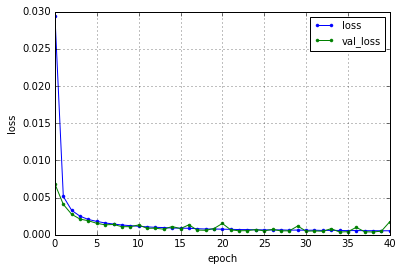

hiden node = 64
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0176 - val_loss: 0.0046
Epoch 2/50
3s - loss: 0.0033 - val_loss: 0.0023
Epoch 3/50
3s - loss: 0.0020 - val_loss: 0.0016
Epoch 4/50
3s - loss: 0.0016 - val_loss: 0.0015
Epoch 5/50
3s - loss: 0.0013 - val_loss: 0.0016
Epoch 6/50
3s - loss: 0.0011 - val_loss: 0.0013
Epoch 7/50
2s - loss: 0.0010 - val_loss: 8.1821e-04
Epoch 8/50
2s - loss: 9.3078e-04 - val_loss: 6.9187e-04
Epoch 9/50
3s - loss: 8.7513e-04 - val_loss: 8.7474e-04
Epoch 10/50
3s - loss: 8.1242e-04 - val_loss: 5.9295e-04
Epoch 11/50
3s - loss: 7.4404e-04 - val_loss: 6.6820e-04
Epoch 12/50
3s - loss: 6.8815e-04 - val_loss: 6.3943e-04
Epoch 13/50
3s - loss: 6.9296e-04 - val_loss: 5.3304e-04
Epoch 14/50
3s - loss: 6.3155e-04 - val_loss: 5.3073e-04
Epoch 15/50
3s - loss: 6.4946e-04 - val_loss: 6.8514e-04
Epoch 16/50
3s - loss: 6.0550e-04 - val_loss: 4.6483e-04
Epoch 17/50
3s - loss: 5.8418e-04 - val_loss: 4.2087e-04
Epoch 18/50
3s - loss: 5.5

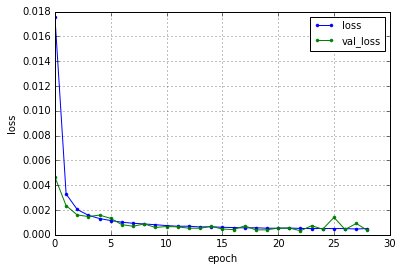

AccY is registed now
Build Complete
(254742,)
windowData's num =7957
SourceData's aborting data = 22
window shape is (7957, 128, 1)
hiden node = 4
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.1857 - val_loss: 0.0709
Epoch 2/50
0s - loss: 0.0468 - val_loss: 0.0318
Epoch 3/50
0s - loss: 0.0263 - val_loss: 0.0228
Epoch 4/50
0s - loss: 0.0216 - val_loss: 0.0205
Epoch 5/50
0s - loss: 0.0198 - val_loss: 0.0190
Epoch 6/50
0s - loss: 0.0184 - val_loss: 0.0178
Epoch 7/50
0s - loss: 0.0171 - val_loss: 0.0163
Epoch 8/50
0s - loss: 0.0159 - val_loss: 0.0156
Epoch 9/50
0s - loss: 0.0149 - val_loss: 0.0145
Epoch 10/50
0s - loss: 0.0142 - val_loss: 0.0138
Epoch 11/50
0s - loss: 0.0138 - val_loss: 0.0134
Epoch 12/50
0s - loss: 0.0134 - val_loss: 0.0134
Epoch 13/50
0s - loss: 0.0132 - val_loss: 0.0133
Epoch 14/50
0s - loss: 0.0129 - val_loss: 0.0129
Epoch 15/50
0s - loss: 0.0127 - val_loss: 0.0125
Epoch 16/50
0s - loss: 0.0125 - val_loss: 0.0124
Epoch 17/50
0s - loss: 0.0123 

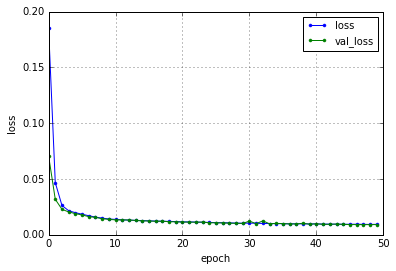

hiden node = 8
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.1118 - val_loss: 0.0336
Epoch 2/50
0s - loss: 0.0259 - val_loss: 0.0220
Epoch 3/50
0s - loss: 0.0201 - val_loss: 0.0188
Epoch 4/50
0s - loss: 0.0180 - val_loss: 0.0170
Epoch 5/50
0s - loss: 0.0161 - val_loss: 0.0151
Epoch 6/50
0s - loss: 0.0145 - val_loss: 0.0137
Epoch 7/50
0s - loss: 0.0135 - val_loss: 0.0133
Epoch 8/50
0s - loss: 0.0128 - val_loss: 0.0122
Epoch 9/50
0s - loss: 0.0122 - val_loss: 0.0126
Epoch 10/50
0s - loss: 0.0117 - val_loss: 0.0113
Epoch 11/50
0s - loss: 0.0113 - val_loss: 0.0108
Epoch 12/50
0s - loss: 0.0111 - val_loss: 0.0111
Epoch 13/50
0s - loss: 0.0105 - val_loss: 0.0103
Epoch 14/50
0s - loss: 0.0102 - val_loss: 0.0096
Epoch 15/50
0s - loss: 0.0099 - val_loss: 0.0098
Epoch 16/50
0s - loss: 0.0095 - val_loss: 0.0093
Epoch 17/50
0s - loss: 0.0092 - val_loss: 0.0087
Epoch 18/50
0s - loss: 0.0088 - val_loss: 0.0085
Epoch 19/50
0s - loss: 0.0087 - val_loss: 0.0091
Epoch 20/50
0s 

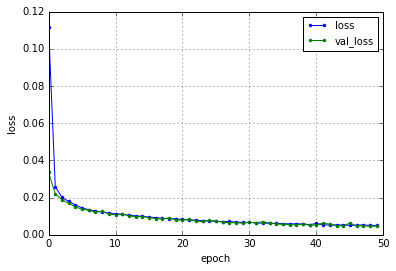

hiden node = 12
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.1232 - val_loss: 0.0295
Epoch 2/50
0s - loss: 0.0231 - val_loss: 0.0196
Epoch 3/50
0s - loss: 0.0179 - val_loss: 0.0163
Epoch 4/50
0s - loss: 0.0152 - val_loss: 0.0140
Epoch 5/50
0s - loss: 0.0137 - val_loss: 0.0130
Epoch 6/50
0s - loss: 0.0127 - val_loss: 0.0121
Epoch 7/50
0s - loss: 0.0121 - val_loss: 0.0115
Epoch 8/50
0s - loss: 0.0116 - val_loss: 0.0110
Epoch 9/50
0s - loss: 0.0109 - val_loss: 0.0106
Epoch 10/50
0s - loss: 0.0105 - val_loss: 0.0099
Epoch 11/50
0s - loss: 0.0098 - val_loss: 0.0093
Epoch 12/50
0s - loss: 0.0094 - val_loss: 0.0094
Epoch 13/50
0s - loss: 0.0089 - val_loss: 0.0083
Epoch 14/50
0s - loss: 0.0085 - val_loss: 0.0088
Epoch 15/50
0s - loss: 0.0081 - val_loss: 0.0075
Epoch 16/50
0s - loss: 0.0076 - val_loss: 0.0078
Epoch 17/50
0s - loss: 0.0073 - val_loss: 0.0069
Epoch 18/50
0s - loss: 0.0073 - val_loss: 0.0102
Epoch 19/50
0s - loss: 0.0066 - val_loss: 0.0062
Epoch 20/50
0s

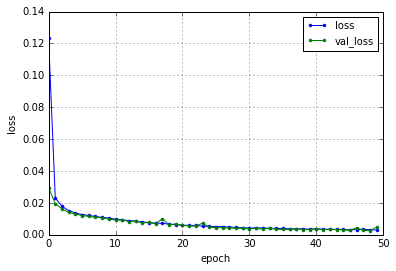

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.1073 - val_loss: 0.0269
Epoch 2/50
0s - loss: 0.0215 - val_loss: 0.0184
Epoch 3/50
0s - loss: 0.0164 - val_loss: 0.0146
Epoch 4/50
0s - loss: 0.0136 - val_loss: 0.0125
Epoch 5/50
0s - loss: 0.0121 - val_loss: 0.0113
Epoch 6/50
0s - loss: 0.0111 - val_loss: 0.0126
Epoch 7/50
0s - loss: 0.0104 - val_loss: 0.0097
Epoch 8/50
0s - loss: 0.0097 - val_loss: 0.0098
Epoch 9/50
0s - loss: 0.0091 - val_loss: 0.0086
Epoch 10/50
0s - loss: 0.0085 - val_loss: 0.0083
Epoch 11/50
0s - loss: 0.0080 - val_loss: 0.0079
Epoch 12/50
0s - loss: 0.0074 - val_loss: 0.0069
Epoch 13/50
0s - loss: 0.0070 - val_loss: 0.0069
Epoch 14/50
0s - loss: 0.0067 - val_loss: 0.0067
Epoch 15/50
0s - loss: 0.0064 - val_loss: 0.0058
Epoch 16/50
0s - loss: 0.0060 - val_loss: 0.0060
Epoch 17/50
0s - loss: 0.0058 - val_loss: 0.0052
Epoch 18/50
0s - loss: 0.0055 - val_loss: 0.0055
Epoch 19/50
0s - loss: 0.0052 - val_loss: 0.0056
Epoch 20/50
0s

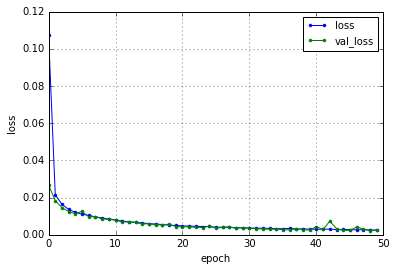

hiden node = 32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0731 - val_loss: 0.0210
Epoch 2/50
0s - loss: 0.0166 - val_loss: 0.0136
Epoch 3/50
0s - loss: 0.0121 - val_loss: 0.0106
Epoch 4/50
0s - loss: 0.0100 - val_loss: 0.0090
Epoch 5/50
0s - loss: 0.0089 - val_loss: 0.0089
Epoch 6/50
0s - loss: 0.0077 - val_loss: 0.0072
Epoch 7/50
0s - loss: 0.0069 - val_loss: 0.0062
Epoch 8/50
0s - loss: 0.0062 - val_loss: 0.0054
Epoch 9/50
0s - loss: 0.0054 - val_loss: 0.0047
Epoch 10/50
0s - loss: 0.0052 - val_loss: 0.0049
Epoch 11/50
0s - loss: 0.0045 - val_loss: 0.0039
Epoch 12/50
0s - loss: 0.0043 - val_loss: 0.0039
Epoch 13/50
0s - loss: 0.0040 - val_loss: 0.0042
Epoch 14/50
0s - loss: 0.0037 - val_loss: 0.0033
Epoch 15/50
0s - loss: 0.0037 - val_loss: 0.0033
Epoch 16/50
0s - loss: 0.0034 - val_loss: 0.0031
Epoch 17/50
0s - loss: 0.0033 - val_loss: 0.0036
Epoch 18/50
0s - loss: 0.0031 - val_loss: 0.0028
Epoch 19/50
0s - loss: 0.0030 - val_loss: 0.0033
Epoch 20/50
0s

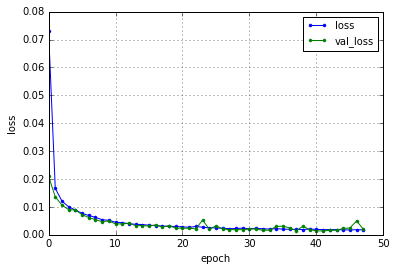

hiden node = 64
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0617 - val_loss: 0.0180
Epoch 2/50
0s - loss: 0.0134 - val_loss: 0.0104
Epoch 3/50
0s - loss: 0.0087 - val_loss: 0.0072
Epoch 4/50
0s - loss: 0.0066 - val_loss: 0.0058
Epoch 5/50
0s - loss: 0.0052 - val_loss: 0.0046
Epoch 6/50
0s - loss: 0.0045 - val_loss: 0.0036
Epoch 7/50
0s - loss: 0.0040 - val_loss: 0.0036
Epoch 8/50
0s - loss: 0.0035 - val_loss: 0.0039
Epoch 9/50
0s - loss: 0.0032 - val_loss: 0.0026
Epoch 10/50
0s - loss: 0.0031 - val_loss: 0.0025
Epoch 11/50
0s - loss: 0.0029 - val_loss: 0.0024
Epoch 12/50
0s - loss: 0.0025 - val_loss: 0.0022
Epoch 13/50
0s - loss: 0.0025 - val_loss: 0.0028
Epoch 14/50
0s - loss: 0.0024 - val_loss: 0.0034
Epoch 15/50
0s - loss: 0.0023 - val_loss: 0.0017
Epoch 16/50
0s - loss: 0.0023 - val_loss: 0.0022
Epoch 17/50
0s - loss: 0.0022 - val_loss: 0.0027
Epoch 18/50
0s - loss: 0.0023 - val_loss: 0.0015
Epoch 19/50
0s - loss: 0.0020 - val_loss: 0.0015
Epoch 20/50
0s

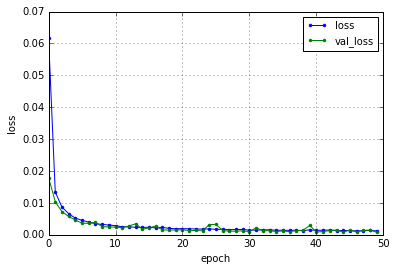

AccY is registed now
Build Complete
(254742,)
windowData's num =3977
SourceData's aborting data = 22
window shape is (3977, 256, 1)
hiden node = 4
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.3422 - val_loss: 0.2710
Epoch 2/50
0s - loss: 0.2081 - val_loss: 0.1562
Epoch 3/50
0s - loss: 0.1285 - val_loss: 0.1059
Epoch 4/50
0s - loss: 0.0920 - val_loss: 0.0798
Epoch 5/50
0s - loss: 0.0712 - val_loss: 0.0633
Epoch 6/50
0s - loss: 0.0575 - val_loss: 0.0521
Epoch 7/50
0s - loss: 0.0480 - val_loss: 0.0442
Epoch 8/50
0s - loss: 0.0411 - val_loss: 0.0382
Epoch 9/50
0s - loss: 0.0362 - val_loss: 0.0358
Epoch 10/50
0s - loss: 0.0330 - val_loss: 0.0330
Epoch 11/50
0s - loss: 0.0311 - val_loss: 0.0309
Epoch 12/50
0s - loss: 0.0300 - val_loss: 0.0311
Epoch 13/50
0s - loss: 0.0292 - val_loss: 0.0289
Epoch 14/50
0s - loss: 0.0285 - val_loss: 0.0302
Epoch 15/50
0s - loss: 0.0287 - val_loss: 0.0299
Epoch 16/50
0s - loss: 0.0274 - val_loss: 0.0287
Epoch 17/50
0s - loss: 0.0269 

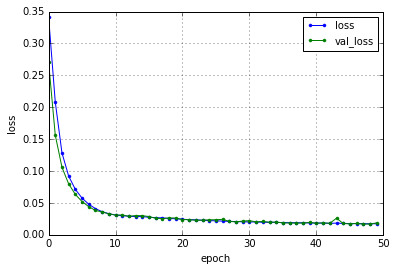

hiden node = 8
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.2736 - val_loss: 0.1468
Epoch 2/50
0s - loss: 0.1009 - val_loss: 0.0718
Epoch 3/50
0s - loss: 0.0600 - val_loss: 0.0507
Epoch 4/50
0s - loss: 0.0453 - val_loss: 0.0411
Epoch 5/50
0s - loss: 0.0376 - val_loss: 0.0362
Epoch 6/50
0s - loss: 0.0329 - val_loss: 0.0312
Epoch 7/50
0s - loss: 0.0301 - val_loss: 0.0297
Epoch 8/50
0s - loss: 0.0284 - val_loss: 0.0326
Epoch 9/50
0s - loss: 0.0274 - val_loss: 0.0263
Epoch 10/50
0s - loss: 0.0276 - val_loss: 0.0255
Epoch 11/50
0s - loss: 0.0265 - val_loss: 0.0276
Epoch 12/50
0s - loss: 0.0254 - val_loss: 0.0252
Epoch 13/50
0s - loss: 0.0241 - val_loss: 0.0238
Epoch 14/50
0s - loss: 0.0238 - val_loss: 0.0264
Epoch 15/50
0s - loss: 0.0226 - val_loss: 0.0219
Epoch 16/50
0s - loss: 0.0220 - val_loss: 0.0213
Epoch 17/50
0s - loss: 0.0216 - val_loss: 0.0220
Epoch 18/50
0s - loss: 0.0210 - val_loss: 0.0205
Epoch 19/50
0s - loss: 0.0208 - val_loss: 0.0203
Epoch 20/50
0s 

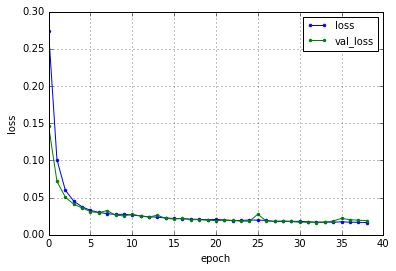

hiden node = 12
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.2629 - val_loss: 0.1334
Epoch 2/50
0s - loss: 0.0892 - val_loss: 0.0634
Epoch 3/50
0s - loss: 0.0530 - val_loss: 0.0450
Epoch 4/50
0s - loss: 0.0403 - val_loss: 0.0362
Epoch 5/50
0s - loss: 0.0337 - val_loss: 0.0313
Epoch 6/50
0s - loss: 0.0299 - val_loss: 0.0283
Epoch 7/50
0s - loss: 0.0278 - val_loss: 0.0267
Epoch 8/50
0s - loss: 0.0263 - val_loss: 0.0307
Epoch 9/50
0s - loss: 0.0250 - val_loss: 0.0267
Epoch 10/50
0s - loss: 0.0243 - val_loss: 0.0263
Epoch 11/50
0s - loss: 0.0240 - val_loss: 0.0220
Epoch 12/50
0s - loss: 0.0228 - val_loss: 0.0240
Epoch 13/50
0s - loss: 0.0220 - val_loss: 0.0212
Epoch 14/50
0s - loss: 0.0213 - val_loss: 0.0199
Epoch 15/50
0s - loss: 0.0208 - val_loss: 0.0285
Epoch 16/50
0s - loss: 0.0204 - val_loss: 0.0195
Epoch 17/50
0s - loss: 0.0193 - val_loss: 0.0219
Epoch 18/50
0s - loss: 0.0200 - val_loss: 0.0194
Epoch 19/50
0s - loss: 0.0190 - val_loss: 0.0211
Epoch 20/50
0s

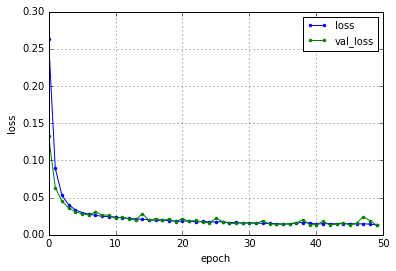

hiden node = 16
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.2456 - val_loss: 0.1112
Epoch 2/50
0s - loss: 0.0740 - val_loss: 0.0527
Epoch 3/50
0s - loss: 0.0449 - val_loss: 0.0388
Epoch 4/50
0s - loss: 0.0354 - val_loss: 0.0324
Epoch 5/50
0s - loss: 0.0306 - val_loss: 0.0295
Epoch 6/50
0s - loss: 0.0277 - val_loss: 0.0298
Epoch 7/50
0s - loss: 0.0261 - val_loss: 0.0254
Epoch 8/50
0s - loss: 0.0245 - val_loss: 0.0232
Epoch 9/50
0s - loss: 0.0238 - val_loss: 0.0255
Epoch 10/50
0s - loss: 0.0229 - val_loss: 0.0358
Epoch 11/50
0s - loss: 0.0222 - val_loss: 0.0219
Epoch 12/50
0s - loss: 0.0210 - val_loss: 0.0202
Epoch 13/50
0s - loss: 0.0202 - val_loss: 0.0184
Epoch 14/50
0s - loss: 0.0196 - val_loss: 0.0182
Epoch 15/50
0s - loss: 0.0186 - val_loss: 0.0177
Epoch 16/50
0s - loss: 0.0184 - val_loss: 0.0176
Epoch 17/50
0s - loss: 0.0180 - val_loss: 0.0169
Epoch 18/50
0s - loss: 0.0169 - val_loss: 0.0162
Epoch 19/50
0s - loss: 0.0174 - val_loss: 0.0214
Epoch 20/50
0s

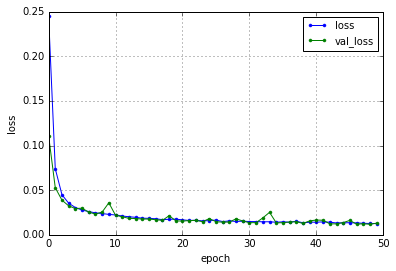

hiden node = 32
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.2067 - val_loss: 0.0657
Epoch 2/50
0s - loss: 0.0477 - val_loss: 0.0383
Epoch 3/50
0s - loss: 0.0336 - val_loss: 0.0301
Epoch 4/50
0s - loss: 0.0281 - val_loss: 0.0261
Epoch 5/50
0s - loss: 0.0248 - val_loss: 0.0246
Epoch 6/50
0s - loss: 0.0232 - val_loss: 0.0221
Epoch 7/50
0s - loss: 0.0209 - val_loss: 0.0277
Epoch 8/50
0s - loss: 0.0203 - val_loss: 0.0192
Epoch 9/50
0s - loss: 0.0189 - val_loss: 0.0195
Epoch 10/50
0s - loss: 0.0187 - val_loss: 0.0210
Epoch 11/50
0s - loss: 0.0173 - val_loss: 0.0162
Epoch 12/50
0s - loss: 0.0169 - val_loss: 0.0187
Epoch 13/50
0s - loss: 0.0161 - val_loss: 0.0151
Epoch 14/50
0s - loss: 0.0168 - val_loss: 0.0174
Epoch 15/50
0s - loss: 0.0153 - val_loss: 0.0144
Epoch 16/50
0s - loss: 0.0157 - val_loss: 0.0265
Epoch 17/50
0s - loss: 0.0148 - val_loss: 0.0168
Epoch 18/50
0s - loss: 0.0138 - val_loss: 0.0133
Epoch 19/50
0s - loss: 0.0139 - val_loss: 0.0136
Epoch 20/50
0s

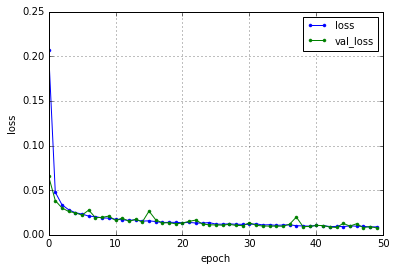

hiden node = 64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1518 - val_loss: 0.0428
Epoch 2/50
0s - loss: 0.0363 - val_loss: 0.0318
Epoch 3/50
0s - loss: 0.0290 - val_loss: 0.0266
Epoch 4/50
0s - loss: 0.0244 - val_loss: 0.0250
Epoch 5/50
0s - loss: 0.0210 - val_loss: 0.0197
Epoch 6/50
0s - loss: 0.0186 - val_loss: 0.0216
Epoch 7/50
0s - loss: 0.0177 - val_loss: 0.0165
Epoch 8/50
0s - loss: 0.0157 - val_loss: 0.0204
Epoch 9/50
0s - loss: 0.0160 - val_loss: 0.0144
Epoch 10/50
0s - loss: 0.0142 - val_loss: 0.0199
Epoch 11/50
0s - loss: 0.0136 - val_loss: 0.0125
Epoch 12/50
0s - loss: 0.0133 - val_loss: 0.0157
Epoch 13/50
0s - loss: 0.0128 - val_loss: 0.0116
Epoch 14/50
0s - loss: 0.0126 - val_loss: 0.0156
Epoch 15/50
0s - loss: 0.0123 - val_loss: 0.0114
Epoch 16/50
0s - loss: 0.0115 - val_loss: 0.0104
Epoch 17/50
0s - loss: 0.0115 - val_loss: 0.0099
Epoch 18/50
0s - loss: 0.0106 - val_loss: 0.0098
Epoch 19/50
0s - loss: 0.0103 - val_loss: 0.0093
Epoch 20/50
0s

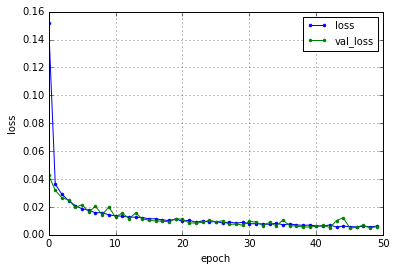

AccY is registed now
Build Complete
(254742,)
windowData's num =1987
SourceData's aborting data = 22
window shape is (1987, 512, 1)
hiden node = 4
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.3823 - val_loss: 0.3683
Epoch 2/50
0s - loss: 0.3461 - val_loss: 0.3164
Epoch 3/50
0s - loss: 0.2921 - val_loss: 0.2648
Epoch 4/50
0s - loss: 0.2451 - val_loss: 0.2232
Epoch 5/50
0s - loss: 0.2078 - val_loss: 0.1908
Epoch 6/50
0s - loss: 0.1788 - val_loss: 0.1656
Epoch 7/50
0s - loss: 0.1563 - val_loss: 0.1461
Epoch 8/50
0s - loss: 0.1389 - val_loss: 0.1309
Epoch 9/50
0s - loss: 0.1253 - val_loss: 0.1190
Epoch 10/50
0s - loss: 0.1145 - val_loss: 0.1093
Epoch 11/50
0s - loss: 0.1054 - val_loss: 0.1010
Epoch 12/50
0s - loss: 0.0977 - val_loss: 0.0940
Epoch 13/50
0s - loss: 0.0911 - val_loss: 0.0879
Epoch 14/50
0s - loss: 0.0854 - val_loss: 0.0826
Epoch 15/50
0s - loss: 0.0805 - val_loss: 0.0779
Epoch 16/50
0s - loss: 0.0760 - val_loss: 0.0738
Epoch 17/50
0s - loss: 0.0721 

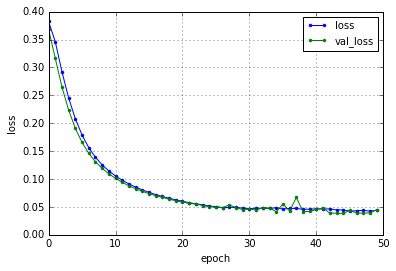

hiden node = 8
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.3707 - val_loss: 0.3430
Epoch 2/50
0s - loss: 0.3140 - val_loss: 0.2769
Epoch 3/50
0s - loss: 0.2482 - val_loss: 0.2169
Epoch 4/50
0s - loss: 0.1959 - val_loss: 0.1734
Epoch 5/50
0s - loss: 0.1587 - val_loss: 0.1431
Epoch 6/50
0s - loss: 0.1330 - val_loss: 0.1221
Epoch 7/50
0s - loss: 0.1148 - val_loss: 0.1070
Epoch 8/50
0s - loss: 0.1015 - val_loss: 0.0954
Epoch 9/50
0s - loss: 0.0910 - val_loss: 0.0860
Epoch 10/50
0s - loss: 0.0826 - val_loss: 0.0786
Epoch 11/50
0s - loss: 0.0758 - val_loss: 0.0726
Epoch 12/50
0s - loss: 0.0702 - val_loss: 0.0675
Epoch 13/50
0s - loss: 0.0655 - val_loss: 0.0633
Epoch 14/50
0s - loss: 0.0615 - val_loss: 0.0595
Epoch 15/50
0s - loss: 0.0582 - val_loss: 0.0563
Epoch 16/50
0s - loss: 0.0551 - val_loss: 0.0535
Epoch 17/50
0s - loss: 0.0524 - val_loss: 0.0520
Epoch 18/50
0s - loss: 0.0502 - val_loss: 0.0494
Epoch 19/50
0s - loss: 0.0483 - val_loss: 0.0469
Epoch 20/50
0s 

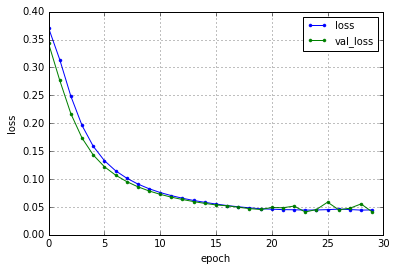

hiden node = 12
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.3671 - val_loss: 0.3270
Epoch 2/50
0s - loss: 0.2803 - val_loss: 0.2268
Epoch 3/50
0s - loss: 0.1921 - val_loss: 0.1569
Epoch 4/50
0s - loss: 0.1368 - val_loss: 0.1172
Epoch 5/50
0s - loss: 0.1062 - val_loss: 0.0952
Epoch 6/50
0s - loss: 0.0884 - val_loss: 0.0813
Epoch 7/50
0s - loss: 0.0767 - val_loss: 0.0717
Epoch 8/50
0s - loss: 0.0683 - val_loss: 0.0647
Epoch 9/50
0s - loss: 0.0622 - val_loss: 0.0594
Epoch 10/50
0s - loss: 0.0575 - val_loss: 0.0554
Epoch 11/50
0s - loss: 0.0538 - val_loss: 0.0519
Epoch 12/50
0s - loss: 0.0507 - val_loss: 0.0492
Epoch 13/50
0s - loss: 0.0482 - val_loss: 0.0468
Epoch 14/50
0s - loss: 0.0462 - val_loss: 0.0462
Epoch 15/50
0s - loss: 0.0444 - val_loss: 0.0434
Epoch 16/50
0s - loss: 0.0433 - val_loss: 0.0428
Epoch 17/50
0s - loss: 0.0423 - val_loss: 0.0429
Epoch 18/50
0s - loss: 0.0429 - val_loss: 0.0412
Epoch 19/50
0s - loss: 0.0421 - val_loss: 0.0415
Epoch 20/50
0s

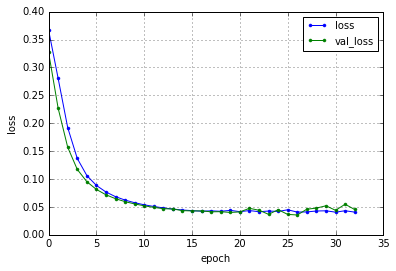

hiden node = 16
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.3626 - val_loss: 0.3141
Epoch 2/50
0s - loss: 0.2598 - val_loss: 0.1990
Epoch 3/50
0s - loss: 0.1629 - val_loss: 0.1286
Epoch 4/50
0s - loss: 0.1116 - val_loss: 0.0957
Epoch 5/50
0s - loss: 0.0871 - val_loss: 0.0786
Epoch 6/50
0s - loss: 0.0734 - val_loss: 0.0679
Epoch 7/50
0s - loss: 0.0645 - val_loss: 0.0607
Epoch 8/50
0s - loss: 0.0583 - val_loss: 0.0556
Epoch 9/50
0s - loss: 0.0537 - val_loss: 0.0516
Epoch 10/50
0s - loss: 0.0502 - val_loss: 0.0485
Epoch 11/50
0s - loss: 0.0473 - val_loss: 0.0460
Epoch 12/50
0s - loss: 0.0453 - val_loss: 0.0439
Epoch 13/50
0s - loss: 0.0432 - val_loss: 0.0423
Epoch 14/50
0s - loss: 0.0421 - val_loss: 0.0440
Epoch 15/50
0s - loss: 0.0408 - val_loss: 0.0410
Epoch 16/50
0s - loss: 0.0396 - val_loss: 0.0384
Epoch 17/50
0s - loss: 0.0401 - val_loss: 0.0401
Epoch 18/50
0s - loss: 0.0407 - val_loss: 0.0459
Epoch 19/50
0s - loss: 0.0411 - val_loss: 0.0369
Epoch 20/50
0s

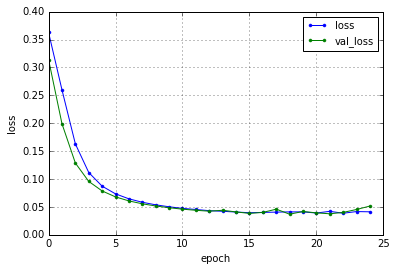

hiden node = 32
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.3434 - val_loss: 0.2601
Epoch 2/50
0s - loss: 0.1997 - val_loss: 0.1411
Epoch 3/50
0s - loss: 0.1134 - val_loss: 0.0893
Epoch 4/50
0s - loss: 0.0784 - val_loss: 0.0683
Epoch 5/50
0s - loss: 0.0630 - val_loss: 0.0578
Epoch 6/50
0s - loss: 0.0547 - val_loss: 0.0515
Epoch 7/50
0s - loss: 0.0495 - val_loss: 0.0473
Epoch 8/50
0s - loss: 0.0459 - val_loss: 0.0445
Epoch 9/50
0s - loss: 0.0433 - val_loss: 0.0419
Epoch 10/50
0s - loss: 0.0412 - val_loss: 0.0402
Epoch 11/50
0s - loss: 0.0395 - val_loss: 0.0386
Epoch 12/50
0s - loss: 0.0383 - val_loss: 0.0372
Epoch 13/50
0s - loss: 0.0374 - val_loss: 0.0366
Epoch 14/50
0s - loss: 0.0367 - val_loss: 0.0383
Epoch 15/50
0s - loss: 0.0375 - val_loss: 0.0367
Epoch 16/50
0s - loss: 0.0384 - val_loss: 0.0371
Epoch 17/50
0s - loss: 0.0368 - val_loss: 0.0355
Epoch 18/50
0s - loss: 0.0386 - val_loss: 0.0350
Epoch 19/50
0s - loss: 0.0363 - val_loss: 0.0353
Epoch 20/50
0s

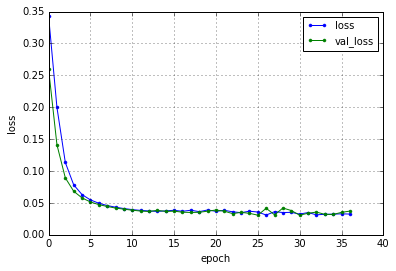

hiden node = 64
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.3093 - val_loss: 0.1841
Epoch 2/50
0s - loss: 0.1284 - val_loss: 0.0846
Epoch 3/50
0s - loss: 0.0699 - val_loss: 0.0582
Epoch 4/50
0s - loss: 0.0535 - val_loss: 0.0491
Epoch 5/50
0s - loss: 0.0467 - val_loss: 0.0444
Epoch 6/50
0s - loss: 0.0430 - val_loss: 0.0414
Epoch 7/50
0s - loss: 0.0403 - val_loss: 0.0395
Epoch 8/50
0s - loss: 0.0383 - val_loss: 0.0382
Epoch 9/50
0s - loss: 0.0368 - val_loss: 0.0359
Epoch 10/50
0s - loss: 0.0354 - val_loss: 0.0346
Epoch 11/50
0s - loss: 0.0344 - val_loss: 0.0335
Epoch 12/50
0s - loss: 0.0335 - val_loss: 0.0326
Epoch 13/50
0s - loss: 0.0330 - val_loss: 0.0330
Epoch 14/50
0s - loss: 0.0334 - val_loss: 0.0310
Epoch 15/50
0s - loss: 0.0320 - val_loss: 0.0334
Epoch 16/50
0s - loss: 0.0344 - val_loss: 0.0375
Epoch 17/50
0s - loss: 0.0313 - val_loss: 0.0350
Epoch 18/50
0s - loss: 0.0323 - val_loss: 0.0345
Epoch 19/50
0s - loss: 0.0311 - val_loss: 0.0300
Epoch 20/50
0s

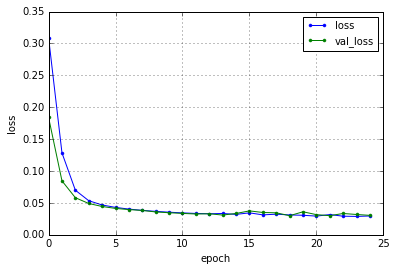

AccY is registed now
Build Complete
(254742,)
windowData's num =992
SourceData's aborting data = 22
window shape is (992, 1024, 1)
hiden node = 4
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.3866 - val_loss: 0.3829
Epoch 2/50
0s - loss: 0.3812 - val_loss: 0.3780
Epoch 3/50
0s - loss: 0.3758 - val_loss: 0.3716
Epoch 4/50
0s - loss: 0.3688 - val_loss: 0.3636
Epoch 5/50
0s - loss: 0.3604 - val_loss: 0.3546
Epoch 6/50
0s - loss: 0.3510 - val_loss: 0.3447
Epoch 7/50
0s - loss: 0.3410 - val_loss: 0.3345
Epoch 8/50
0s - loss: 0.3308 - val_loss: 0.3244
Epoch 9/50
0s - loss: 0.3208 - val_loss: 0.3145
Epoch 10/50
0s - loss: 0.3110 - val_loss: 0.3050
Epoch 11/50
0s - loss: 0.3016 - val_loss: 0.2957
Epoch 12/50
0s - loss: 0.2925 - val_loss: 0.2868
Epoch 13/50
0s - loss: 0.2837 - val_loss: 0.2783
Epoch 14/50
0s - loss: 0.2753 - val_loss: 0.2701
Epoch 15/50
0s - loss: 0.2672 - val_loss: 0.2622
Epoch 16/50
0s - loss: 0.2594 - val_loss: 0.2546
Epoch 17/50
0s - loss: 0.2520 - v

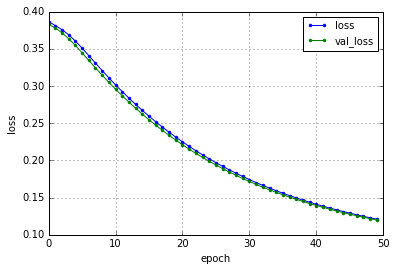

hiden node = 8
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.3907 - val_loss: 0.3831
Epoch 2/50
0s - loss: 0.3798 - val_loss: 0.3737
Epoch 3/50
0s - loss: 0.3696 - val_loss: 0.3619
Epoch 4/50
0s - loss: 0.3569 - val_loss: 0.3479
Epoch 5/50
0s - loss: 0.3424 - val_loss: 0.3327
Epoch 6/50
0s - loss: 0.3271 - val_loss: 0.3170
Epoch 7/50
0s - loss: 0.3112 - val_loss: 0.3010
Epoch 8/50
0s - loss: 0.2952 - val_loss: 0.2852
Epoch 9/50
0s - loss: 0.2797 - val_loss: 0.2702
Epoch 10/50
0s - loss: 0.2649 - val_loss: 0.2560
Epoch 11/50
0s - loss: 0.2511 - val_loss: 0.2427
Epoch 12/50
0s - loss: 0.2381 - val_loss: 0.2303
Epoch 13/50
0s - loss: 0.2261 - val_loss: 0.2189
Epoch 14/50
0s - loss: 0.2150 - val_loss: 0.2083
Epoch 15/50
0s - loss: 0.2047 - val_loss: 0.1985
Epoch 16/50
0s - loss: 0.1952 - val_loss: 0.1895
Epoch 17/50
0s - loss: 0.1864 - val_loss: 0.1811
Epoch 18/50
0s - loss: 0.1783 - val_loss: 0.1734
Epoch 19/50
0s - loss: 0.1708 - val_loss: 0.1663
Epoch 20/50
0s - 

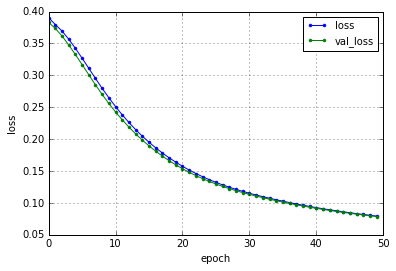

hiden node = 12
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.3956 - val_loss: 0.3834
Epoch 2/50
0s - loss: 0.3782 - val_loss: 0.3697
Epoch 3/50
0s - loss: 0.3638 - val_loss: 0.3521
Epoch 4/50
0s - loss: 0.3443 - val_loss: 0.3301
Epoch 5/50
0s - loss: 0.3216 - val_loss: 0.3066
Epoch 6/50
0s - loss: 0.2982 - val_loss: 0.2838
Epoch 7/50
0s - loss: 0.2760 - val_loss: 0.2626
Epoch 8/50
0s - loss: 0.2554 - val_loss: 0.2432
Epoch 9/50
0s - loss: 0.2367 - val_loss: 0.2257
Epoch 10/50
0s - loss: 0.2199 - val_loss: 0.2100
Epoch 11/50
0s - loss: 0.2048 - val_loss: 0.1959
Epoch 12/50
0s - loss: 0.1912 - val_loss: 0.1833
Epoch 13/50
0s - loss: 0.1791 - val_loss: 0.1721
Epoch 14/50
0s - loss: 0.1684 - val_loss: 0.1621
Epoch 15/50
0s - loss: 0.1588 - val_loss: 0.1532
Epoch 16/50
0s - loss: 0.1502 - val_loss: 0.1452
Epoch 17/50
0s - loss: 0.1426 - val_loss: 0.1382
Epoch 18/50
0s - loss: 0.1358 - val_loss: 0.1319
Epoch 19/50
0s - loss: 0.1298 - val_loss: 0.1263
Epoch 20/50
0s -

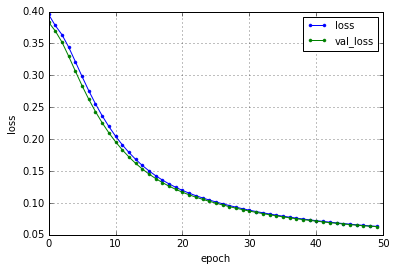

hiden node = 16
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.3893 - val_loss: 0.3806
Epoch 2/50
0s - loss: 0.3757 - val_loss: 0.3654
Epoch 3/50
0s - loss: 0.3577 - val_loss: 0.3427
Epoch 4/50
0s - loss: 0.3329 - val_loss: 0.3150
Epoch 5/50
0s - loss: 0.3044 - val_loss: 0.2860
Epoch 6/50
0s - loss: 0.2758 - val_loss: 0.2585
Epoch 7/50
0s - loss: 0.2493 - val_loss: 0.2339
Epoch 8/50
0s - loss: 0.2258 - val_loss: 0.2123
Epoch 9/50
0s - loss: 0.2052 - val_loss: 0.1935
Epoch 10/50
0s - loss: 0.1875 - val_loss: 0.1774
Epoch 11/50
0s - loss: 0.1722 - val_loss: 0.1635
Epoch 12/50
0s - loss: 0.1590 - val_loss: 0.1516
Epoch 13/50
0s - loss: 0.1477 - val_loss: 0.1414
Epoch 14/50
0s - loss: 0.1381 - val_loss: 0.1326
Epoch 15/50
0s - loss: 0.1298 - val_loss: 0.1251
Epoch 16/50
0s - loss: 0.1227 - val_loss: 0.1187
Epoch 17/50
0s - loss: 0.1166 - val_loss: 0.1131
Epoch 18/50
0s - loss: 0.1113 - val_loss: 0.1082
Epoch 19/50
0s - loss: 0.1066 - val_loss: 0.1039
Epoch 20/50
0s -

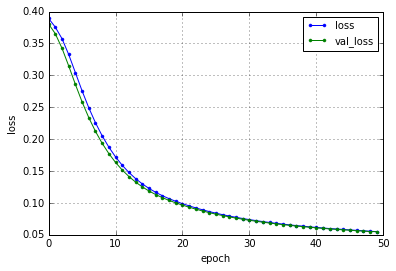

hiden node = 32
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.3821 - val_loss: 0.3606
Epoch 2/50
0s - loss: 0.3499 - val_loss: 0.3297
Epoch 3/50
0s - loss: 0.3167 - val_loss: 0.2931
Epoch 4/50
0s - loss: 0.2792 - val_loss: 0.2553
Epoch 5/50
0s - loss: 0.2425 - val_loss: 0.2208
Epoch 6/50
0s - loss: 0.2097 - val_loss: 0.1912
Epoch 7/50
0s - loss: 0.1820 - val_loss: 0.1667
Epoch 8/50
0s - loss: 0.1592 - val_loss: 0.1468
Epoch 9/50
0s - loss: 0.1408 - val_loss: 0.1310
Epoch 10/50
0s - loss: 0.1262 - val_loss: 0.1184
Epoch 11/50
0s - loss: 0.1146 - val_loss: 0.1084
Epoch 12/50
0s - loss: 0.1054 - val_loss: 0.1004
Epoch 13/50
0s - loss: 0.0979 - val_loss: 0.0939
Epoch 14/50
0s - loss: 0.0919 - val_loss: 0.0885
Epoch 15/50
0s - loss: 0.0868 - val_loss: 0.0839
Epoch 16/50
0s - loss: 0.0824 - val_loss: 0.0799
Epoch 17/50
0s - loss: 0.0786 - val_loss: 0.0764
Epoch 18/50
0s - loss: 0.0753 - val_loss: 0.0733
Epoch 19/50
0s - loss: 0.0723 - val_loss: 0.0706
Epoch 20/50
0s -

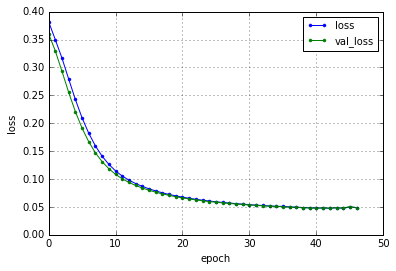

hiden node = 64
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.3864 - val_loss: 0.3501
Epoch 2/50
0s - loss: 0.3328 - val_loss: 0.3001
Epoch 3/50
0s - loss: 0.2797 - val_loss: 0.2436
Epoch 4/50
0s - loss: 0.2241 - val_loss: 0.1916
Epoch 5/50
0s - loss: 0.1758 - val_loss: 0.1506
Epoch 6/50
0s - loss: 0.1391 - val_loss: 0.1212
Epoch 7/50
0s - loss: 0.1134 - val_loss: 0.1013
Epoch 8/50
0s - loss: 0.0962 - val_loss: 0.0882
Epoch 9/50
0s - loss: 0.0847 - val_loss: 0.0793
Epoch 10/50
0s - loss: 0.0768 - val_loss: 0.0730
Epoch 11/50
0s - loss: 0.0712 - val_loss: 0.0683
Epoch 12/50
0s - loss: 0.0669 - val_loss: 0.0647
Epoch 13/50
0s - loss: 0.0636 - val_loss: 0.0617
Epoch 14/50
0s - loss: 0.0608 - val_loss: 0.0593
Epoch 15/50
0s - loss: 0.0586 - val_loss: 0.0573
Epoch 16/50
0s - loss: 0.0567 - val_loss: 0.0556
Epoch 17/50
0s - loss: 0.0551 - val_loss: 0.0542
Epoch 18/50
0s - loss: 0.0538 - val_loss: 0.0530
Epoch 19/50
0s - loss: 0.0526 - val_loss: 0.0519
Epoch 20/50
0s -

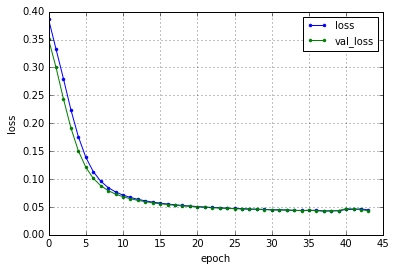

In [8]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    w=window.Window()
    w.SetData(Axis,dic[Axis])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))
    
    # define SaveFileName
    for encoding_dim in EncodingDim:
        print "hiden node = "+str(encoding_dim)
        SaveFileNameEncord=DataName+'_encoded'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameDecord=DataName+'_decoded'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameNet=DataName+'_net'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameTrain=DataName+'_train'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameTest=DataName+'_test'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameGlaph=GlaphDataPath+DataName+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh')(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer='adadelta', loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        verbose=2 ,
                        batch_size=shapeNum/4,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])
        time.sleep(0.1)
        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()